### Recurrent Neural Network

Build multiple RNN on IMDB review data to compare performance between RNN's using  SimpleRNN layers,  RNN's with LSTM layers, Bi-directional RNNs and finally 1D Convolutional Neural networks

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np
from keras.layers import Dense, SimpleRNN, Embedding, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.models import Sequential
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [0]:
#Gain access to Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
max_features, maxlen, batch_size = 10000, 500, 32

print("Loading data")
(x_train, y_train), (x_test,y_test) = imdb.load_data(num_words=max_features)

print(len(x_train), ' train sequences')
print(len(x_test),' test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('input_train_shape: ', x_train.shape)
print('input_test_shape: ', x_test.shape)

Loading data
25000  train sequences
25000  test sequences
Pad sequences (samples x time)
input_train_shape:  (25000, 500)
input_test_shape:  (25000, 500)


In [0]:
def plot_performance(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1,len(loss)+1)

  plt.plot(epochs,acc,'bo',label='Training accuracy')
  plt.plot(epochs,val_acc,'b',label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs,loss,'bo',label='Training loss')
  plt.plot(epochs,val_loss,'b',label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

### RNN using SimpleRNN layer

Train a recurrent network using an Embedding layer and a SimpleRNN
layer and measure performance

In [0]:
model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train,y_train,
                   batch_size=128,
                   epochs=10,
                   validation_split=0.2)

model.save('gdrive/My Drive/Colab Notebooks/models/simpleRNN_imdb_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.6482 - acc: 0.6077 - val_loss: 0.5741 - val_acc: 0.7262
Epoch 2/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.4494 - acc: 0.8085 - val_loss: 0.4093 - val_acc: 0.8258
Epoch 3/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.3216 - acc: 0.8690 - val_loss: 0.3605 - val_acc: 0.8480
Epoch 4/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.2324 - acc: 0.9116 - val_loss: 0.3949 - val_acc: 0.8342
Epoch 5/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.1942 - acc: 0.9290 - val_loss: 0.4009 - val_acc: 0.8638
Epoch 6/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.1230 - acc: 0.9579 - val_loss: 0.3982 - val_acc: 0.8682
Epoch 7/1

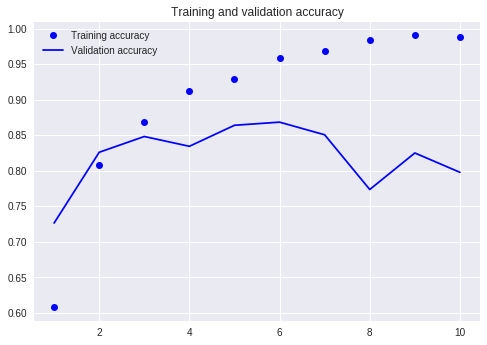

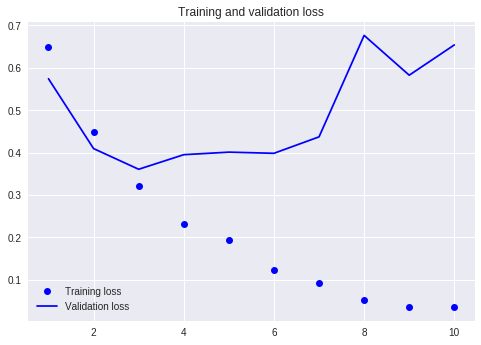

In [0]:
plot_performance(history)

We get a validation accuracy of 86%. We can increase the 'maxlen' so that the RNN  considers more than just the first 500 words giving it access to more information. 

But SimpleRNN isn't the best option. LSTMs or GRU layers perform much better.

### RNN using LSTM layer

Evaluate performance of LSTM layer

In [0]:
model = Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(x_train,y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

model.save('gdrive/My Drive/Colab Notebooks/models/LSTM_imdb_model.h5')

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 130s 7ms/step - loss: 0.5035 - acc: 0.7657 - val_loss: 0.4040 - val_acc: 0.8266
Epoch 2/10
20000/20000 [==============================] - 130s 6ms/step - loss: 0.2967 - acc: 0.8845 - val_loss: 0.2890 - val_acc: 0.8784
Epoch 3/10
20000/20000 [==============================] - 129s 6ms/step - loss: 0.2355 - acc: 0.9105 - val_loss: 0.4602 - val_acc: 0.8536
Epoch 4/10
20000/20000 [==============================] - 130s 7ms/step - loss: 0.2009 - acc: 0.9252 - val_loss: 0.3004 - val_acc: 0.8702
Epoch 5/10
20000/20000 [==============================] - 129s 6ms/step - loss: 0.1776 - acc: 0.9338 - val_loss: 0.3372 - val_acc: 0.8794
Epoch 6/10
20000/20000 [==============================] - 129s 6ms/step - loss: 0.1595 - acc: 0.9412 - val_loss: 0.3873 - val_acc: 0.8538
Epoch 7/10
20000/20000 [==============================] - 129s 6ms/step - loss: 0.1403 - acc: 0.9485 - val_loss: 0.3400 - v

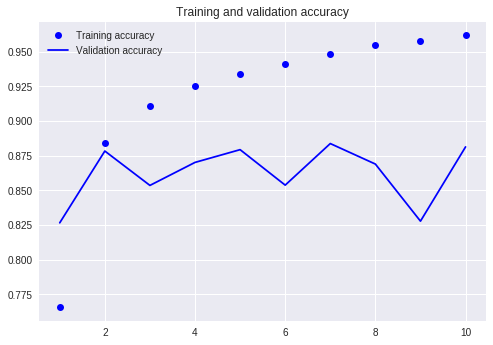

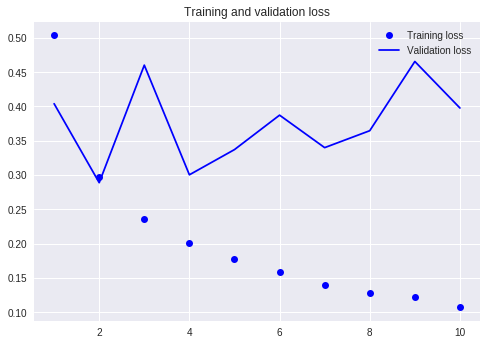

In [0]:
plot_performance(history)

This time we get closer to 89% validation accuracy. Let's evaluate Bidirectional RNNs for this task.

### RNN using Bidirectional layer

In [0]:
model = Sequential()
model.add(Embedding(max_features,32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

model.save('gdrive/My Drive/Colab Notebooks/models/bidirectionalRNN_imdb_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 422s 21ms/step - loss: 0.5112 - acc: 0.7601 - val_loss: 0.3649 - val_acc: 0.8514
Epoch 2/10
20000/20000 [==============================] - 498s 25ms/step - loss: 0.3002 - acc: 0.8830 - val_loss: 0.2844 - val_acc: 0.8828
Epoch 3/10
20000/20000 [==============================] - 496s 25ms/step - loss: 0.2257 - acc: 0.9143 - val_loss: 0.3203 - val_acc: 0.8838
Epoch 4/10
20000/20000 [==============================] - 488s 24ms/step - loss: 0.2043 - acc: 0.9254 - val_loss: 0.3171 - val_acc: 0.8744
Epoch 5/10
20000/20000 [==============================] - 491s 25ms/step - loss: 0.1778 - acc: 0.9363 - val_loss: 0.2928 - val_acc: 0.8792
Epoch 6/10
20000/20000 [==============================] - 491s 25ms/step - loss: 0.1578 - acc: 0.9430 - val_loss: 0.3170 - val_acc: 0.88

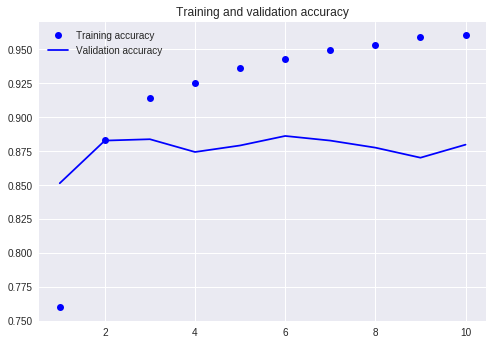

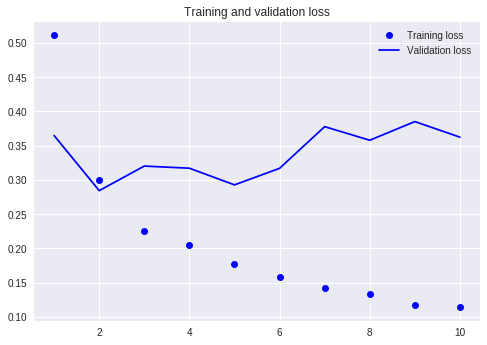

In [0]:
plot_performance(history)

Performs slightly better than the regular LSTM, achieving over 89% validation accuracy. Overfits faster as it has twice as many parameters as a unidirectional RNN. Performance can be improved by regularizing it using recurrent dropout

### 1D Convolutional Neural Network

Small 1D ConvNets with dilated kernels offer a faster alternative to RNN's for simple tasks like text classification.

In [0]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))

model.summary()

model.compile(optimizer=RMSprop(1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(x_train,y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

model.save('gdrive/My Drive/Colab Notebooks/models/Conv1D_imdb_model.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


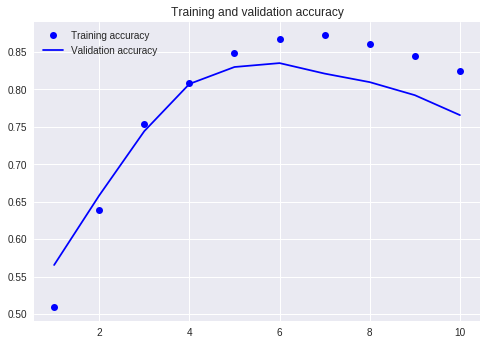

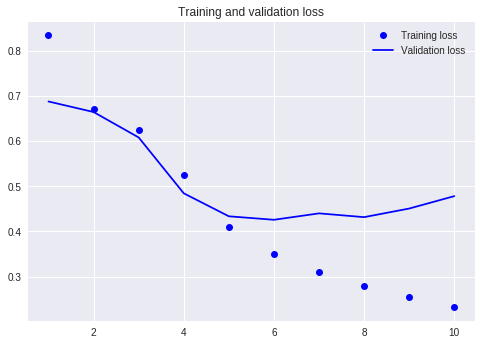

In [0]:
plot_performance(history)

While validation accuracy is less than LSTM, the model is faster to train by multiple orders of magnitude.